In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [6]:
filepath_train = '../Data/dichalcogenides_public/'
filepath_test = '../Data/dichalcogenides_private/'

targets = pd.read_csv(filepath_train + 'targets.csv', index_col=0)
train_files = os.listdir(filepath_train + 'images/')
test_files = os.listdir(filepath_test + 'images/')

In [33]:
dist_files = os.listdir(filepath_train + 'distances/')
dist_matrix = pd.DataFrame()
for file in dist_files:
    dists = pd.read_csv(filepath_train + 'distances/' + file, index_col=0)
    dists.columns = [file[:-4]]
    dists.index = dists.index.map(lambda x: x[:-5])
    dist_matrix = pd.concat((dist_matrix, dists), axis=1)

In [175]:
predict = []
k = 100
for file in dist_files:
    idx = file[:-4]
    dist = dist_matrix.loc[idx]
    dist[dist==0] = 1000
    dist = dist.sort_values()
    neighs = dist[:k].index
    x = targets.loc[neighs].band_gap
    x = sorted(x)
    for i in range(len(x)-1):
        if x[i+1] - x[i]  < 0.02:
            x[i+1] = x[i]
    x = pd.Series(x)
    predict.append(x.mode().median())
predictions = pd.DataFrame(data={'band_gap': predict}, index=dist_matrix.columns)

In [179]:
IDs = dist_matrix.columns
ae = np.abs(predictions - targets.loc[IDs])
ae.columns = ['abs_err']
(ae < 0.02).sum() / len(predictions)

abs_err    0.68722
dtype: float64

In [203]:
wrong = np.array(ae.index[(ae>0.02).abs_err])

In [229]:
len(targets.loc[wrong].index[(targets.loc[wrong]<0.75).band_gap]) / len(wrong)

0.8136200716845878

In [208]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

def plot_dist(idx):
    X  = dist_matrix.loc[idx]
    IDs = dist_matrix.columns
    Y = np.abs(targets.loc[IDs]- targets.loc[idx])
    X[X==1000] = 0
    plt.scatter(X.to_numpy(), Y.to_numpy(), s=0.8)
    abline(0, 0.02)
    plt.show()

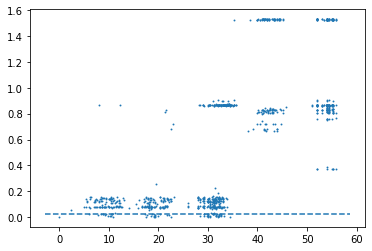

Target: 0.2782


In [216]:
i = 5
plot_dist(wrong[i])
print('Target:', targets.loc[wrong[i]].band_gap)

In [63]:
idx = dist_files[3][:-4]
dist = dist_matrix.loc[idx]
#dist[dist==0] = 1000
print(dist.index[dist.argmin()])
print(idx)
print(dist.argmin())

6141e8d5baaf234b35290490
6141d510baaf234b35290316
269


In [41]:
from sklearn.neighbors import KNeighborsRegressor

X_test = np.transpose(dist_matrix.to_numpy())

neigh = KNeighborsRegressor(n_neighbors=1, metric='precomputed')
#neigh.fit(???)
neigh.predict(X_test)

NotFittedError: This KNeighborsRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.